what to do?
so when the models have different resolution we could do 2 things:
take highest resolution and for lower res ones take the value of nearest "pixel" for each one (this gives us high res results but lower resolution models will have high errors does not really work for them)
take lowest res and calculate the average of nearby "pixels"(maybe even by their overlap) for each large pixel this will work but only give us low res results

maybe do it individually for each model (so we can use that models res) to get a higher res lowest res estimate. (but that might be difficult and also makes it harder to compare models)

In [1]:
import xarray as xr
import intake
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path_precip = "lehre/msc-intro-computational-meteorology-exercises-w2025/ERA5/ERA5_monthly.1940-2025.precip_radflx.nc"
path_wind = "lehre/msc-intro-computational-meteorology-exercises-w2025/ERA5/ERA5_monthly.1940-2025.t2m_wind10.nc"

In [3]:
data_precip = xr.open_dataset(path_precip)
data_wind = xr.open_dataset(path_wind)

In [ ]:
data_wind

<xarray.Dataset> Size: 13GB
Dimensions:     (valid_time: 1029, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 8kB 1940-01-01 ... 2025-09-01
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 16kB ...
Data variables:
    u10         (valid_time, latitude, longitude) float32 4GB ...
    v10         (valid_time, latitude, longitude) float32 4GB ...
    t2m         (valid_time, latitude, longitude) float32 4GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-27T21:14 GRIB to CDM+CF via cfgrib-0.9.1...

In [53]:
long_vals

array([282.25, 282.5 , 282.75, 283.  , 283.25, 283.5 , 283.75, 284.  ,
       284.25, 284.5 , 284.75, 285.  , 285.25, 285.5 , 285.75, 286.  ,
       286.25, 286.5 , 286.75, 287.  , 287.25, 287.5 , 287.75, 288.  ,
       288.25, 288.5 , 288.75, 289.  , 289.25, 289.5 , 289.75, 290.  ,
       290.25, 290.5 , 290.75, 291.  , 291.25, 291.5 , 291.75, 292.  ,
       292.25, 292.5 , 292.75, 293.  , 293.25, 293.5 , 293.75, 294.  ,
       294.25, 294.5 , 294.75, 295.  , 295.25, 295.5 , 295.75, 296.  ,
       296.25, 296.5 , 296.75, 297.  , 297.25, 297.5 , 297.75])

In [5]:
lat_boundary = [-32,-14]
long_boundary = [360-78,360-62]

#selecting the lat and long values in our dataset which we can then use to select data
lat_vals = data_wind["t2m"]["latitude"].values
long_vals = data_wind["t2m"]["longitude"].values
lat_vals = lat_vals[lat_vals>lat_boundary[0]]
lat_vals = lat_vals[lat_vals<lat_boundary[1]]

long_vals = long_vals[long_vals>long_boundary[0]]
long_vals = long_vals[long_vals<long_boundary[1]]
#long_vals

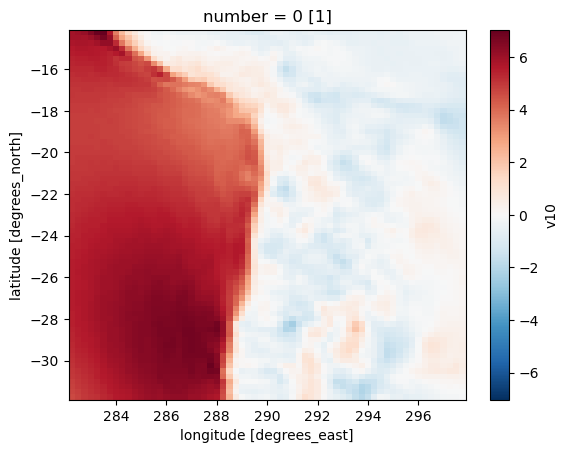

In [43]:
data_wind.sel({"latitude":lat_vals,"longitude":long_vals}).mean("valid_time")["v10"].plot()

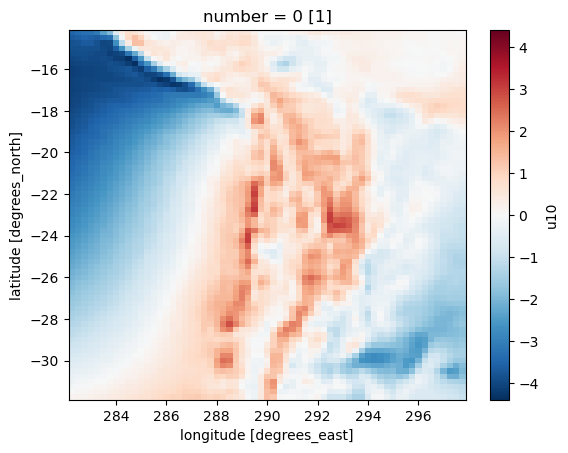

In [40]:
data_wind.sel({"latitude":lat_vals,"longitude":long_vals}).mean("valid_time")["u10"].plot()

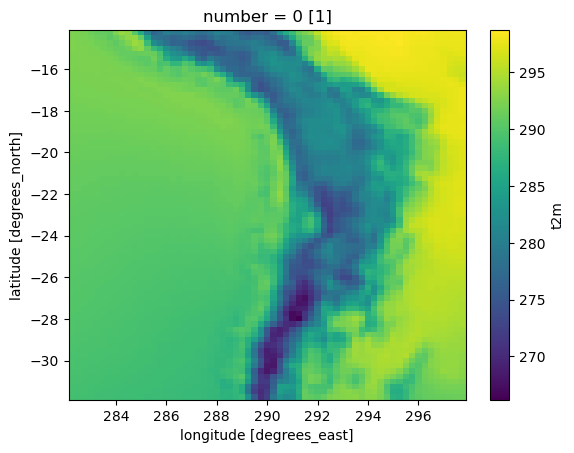

In [34]:
data_wind["t2m"].sel({"latitude":lat_vals,"longitude":long_vals}).mean("valid_time").plot()

In [31]:
data_wind["t2m"].sel({"latitude":lat_vals,"longitude":long_vals})

<xarray.DataArray 't2m' (valid_time: 1029, latitude: 71, longitude: 63)> Size: 18MB
[4602717 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 8kB 1940-01-01 ... 2025-09-01
  * latitude    (latitude) float64 568B -14.25 -14.5 -14.75 ... -31.5 -31.75
  * longitude   (longitude) float64 504B 282.2 282.5 282.8 ... 297.2 297.5 297.8
    expver      (valid_time) <U4 16kB ...
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

CIMP6 data

In [13]:
cat = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")
query = dict(
    variable_id=['tas'],
    table_id='Amon',
    experiment_id=['historical'],
    grid_label='gn',
    member_id='r1i1p1f1'
)

cat_subset = cat.search(require_all_on=["source_id"], **query)
dsets = cat_subset.to_dataset_dict(
    zarr_kwargs={'consolidated': True},
    storage_options={'token': 'anon'}
)
list(dsets)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


['CMIP.NCC.NorESM2-MM.historical.Amon.gn',
 'CMIP.BCC.BCC-ESM1.historical.Amon.gn',
 'CMIP.NCAR.CESM2-WACCM-FV2.historical.Amon.gn',
 'CMIP.NCAR.CESM2-FV2.historical.Amon.gn',
 'CMIP.MPI-M.ICON-ESM-LR.historical.Amon.gn',
 'CMIP.CAMS.CAMS-CSM1-0.historical.Amon.gn',
 'CMIP.NUIST.NESM3.historical.Amon.gn',
 'CMIP.CMCC.CMCC-CM2-HR4.historical.Amon.gn',
 'CMIP.MRI.MRI-ESM2-0.historical.Amon.gn',
 'CMIP.AWI.AWI-ESM-1-1-LR.historical.Amon.gn',
 'CMIP.CAS.FGOALS-g3.historical.Amon.gn',
 'CMIP.NCAR.CESM2-WACCM.historical.Amon.gn',
 'CMIP.NASA-GISS.GISS-E2-1-G.historical.Amon.gn',
 'CMIP.CAS.CAS-ESM2-0.historical.Amon.gn',
 'CMIP.UA.MCM-UA-1-0.historical.Amon.gn',
 'CMIP.HAMMOZ-Consortium.MPI-ESM-1-2-HAM.historical.Amon.gn',
 'CMIP.MPI-M.MPI-ESM1-2-LR.historical.Amon.gn',
 'CMIP.AS-RCEC.TaiESM1.historical.Amon.gn',
 'CMIP.NCC.NorESM2-LM.historical.Amon.gn',
 'CMIP.AWI.AWI-CM-1-1-MR.historical.Amon.gn',
 'CMIP.CSIRO.ACCESS-ESM1-5.historical.Amon.gn',
 'CMIP.NASA-GISS.GISS-E2-1-G-CC.historical.A

In [61]:
curr_ds

<xarray.Dataset> Size: 406MB
Dimensions:         (lat: 160, bnds: 2, lon: 320, member_id: 1,
                     dcpp_init_year: 1, time: 1980)
Coordinates:
    height          float64 8B ...
  * lat             (lat) float64 1kB -89.14 -88.03 -86.91 ... 86.91 88.03 89.14
    lat_bnds        (lat, bnds) float64 3kB dask.array<chunksize=(160, 2), meta=np.ndarray>
  * lon             (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 356.6 357.8 358.9
    lon_bnds        (lon, bnds) float64 5kB dask.array<chunksize=(320, 2), meta=np.ndarray>
  * time            (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:...
    time_bnds       (time, bnds) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: bnds
Data variables:
    tas             (member_id, dcpp_init_year, time, lat, lon) float32 406MB dask.array<chunksize=(1, 1, 600, 160, 320), meta=np.ndarray>
Attributes: (12/65)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    Standard
    branch_time_in_child:             0.0
    branch_time_in_parent:            3025.0
    cmor_version:                     3.4.0
    ...                               ...
    intake_esm_attrs:variable_id:     tas
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/CAMS/CAMS-CSM1-0/...
    intake_esm_attrs:version:         20190708
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CAMS.CAMS-CSM1-0.historical.Amon.gn

In [50]:
import xesmf as xe

ModuleNotFoundError: No module named 'xesmf'

In [22]:
curr_ds

<xarray.Dataset> Size: 438MB
Dimensions:         (lat: 192, bnds: 2, lon: 288, member_id: 1,
                     dcpp_init_year: 1, time: 1980)
Coordinates:
    height          float64 8B ...
  * lat             (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
    lat_bnds        (lat, bnds) float64 3kB dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon             (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
    lon_bnds        (lon, bnds) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time            (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:...
    time_bnds       (time, bnds) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: bnds
Data variables:
    tas             (member_id, dcpp_init_year, time, lat, lon) float32 438MB dask.array<chunksize=(1, 1, 408, 192, 288), meta=np.ndarray>
Attributes: (12/65)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    Hybrid-restart from year 1200-01-01 of ...
    branch_time:                      0.0
    branch_time_in_child:             0.0
    branch_time_in_parent:            438000.0
    ...                               ...
    intake_esm_attrs:variable_id:     tas
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/NCC/NorESM2-MM/hi...
    intake_esm_attrs:version:         20191108
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCC.NorESM2-MM.historical.Amon.gn

In [47]:
dsiter = iter(dsets)

n = 2
current_model = next(dsiter)
curr_ds = dsets[current_model]
curr_ds = curr_ds.sortby("time")
a = curr_ds.sel({"lat":lat_vals,"lon":long_vals},method="ffill",tolerance=1,drop=False)

In [54]:
help(a)

Help on Dataset in module xarray.core.dataset object:

class Dataset(xarray.core.common.DataWithCoords, xarray.core._aggregations.DatasetAggregations, xarray.computation.arithmetic.DatasetArithmetic, collections.abc.Mapping)
 |  Dataset(data_vars: 'DataVars | None' = None, coords: 'Mapping[Any, Any] | None' = None, attrs: 'Mapping[Any, Any] | None' = None) -> 'None'
 |  
 |  A multi-dimensional, in memory, array database.
 |  
 |  A dataset resembles an in-memory representation of a NetCDF file,
 |  and consists of variables, coordinates and attributes which
 |  together form a self describing dataset.
 |  
 |  Dataset implements the mapping interface with keys given by variable
 |  names and values given by DataArray objects for each variable name.
 |  
 |  By default, pandas indexes are created for one dimensional variables with
 |  name equal to their dimension (i.e., :term:`Dimension coordinate`) so those
 |  variables can be readily used as coordinates for label based indexing. Wh

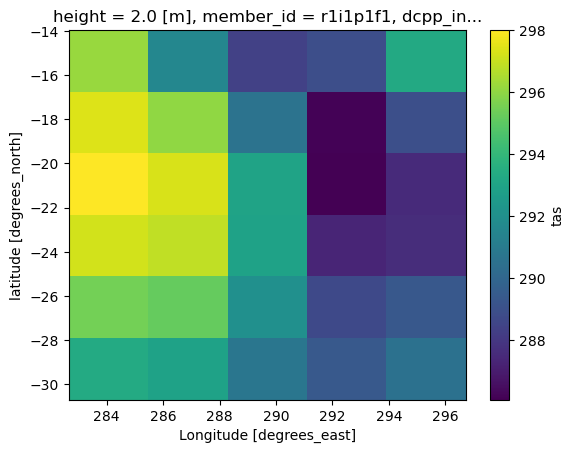

In [61]:
a = curr_ds["tas"].sel({"lat":d_lat_vals,"lon":d_long_vals}).mean("time")
a.plot()

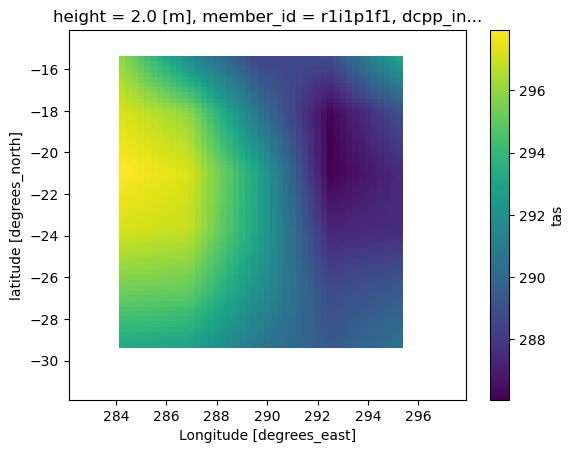

In [62]:
a.interp(lat=lat_vals,lon=long_vals,method="linear").plot()

In [ ]:

Era5 = data_wind["t2m"].sel({"latitude":lat_vals,"longitude":long_vals}).mean("valid_time")

In [82]:
d_lat_vals

array([-29.30135962, -26.51076933, -23.72017393, -20.92957425,
       -18.13897099, -15.34836476])

In [88]:
lat_vals

array([-14.25, -14.5 , -14.75, -15.  , -15.25, -15.5 , -15.75, -16.  ,
       -16.25, -16.5 , -16.75, -17.  , -17.25, -17.5 , -17.75, -18.  ,
       -18.25, -18.5 , -18.75, -19.  , -19.25, -19.5 , -19.75, -20.  ,
       -20.25, -20.5 , -20.75, -21.  , -21.25, -21.5 , -21.75, -22.  ,
       -22.25, -22.5 , -22.75, -23.  , -23.25, -23.5 , -23.75, -24.  ,
       -24.25, -24.5 , -24.75, -25.  , -25.25, -25.5 , -25.75, -26.  ,
       -26.25, -26.5 , -26.75, -27.  , -27.25, -27.5 , -27.75, -28.  ,
       -28.25, -28.5 , -28.75, -29.  , -29.25, -29.5 , -29.75, -30.  ,
       -30.25, -30.5 , -30.75, -31.  , -31.25, -31.5 , -31.75])

In [90]:
(d_lat_vals[1]-d_lat_vals[0])/(lat_vals[1]-lat_vals[0])

-11.162361186206965

In [104]:
a

<xarray.DataArray 'tas' (member_id: 1, dcpp_init_year: 1, lat: 6, lon: 5)> Size: 120B
dask.array<mean_agg-aggregate, shape=(1, 1, 6, 5), dtype=float32, chunksize=(1, 1, 6, 5), chunktype=numpy.ndarray>
Coordinates:
    height          float64 8B ...
  * lat             (lat) float64 48B -29.3 -26.51 -23.72 -20.93 -18.14 -15.35
  * lon             (lon) float64 40B 284.1 286.9 289.7 292.5 295.3
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan

In [103]:
Era5

<xarray.DataArray 't2m' (latitude: 71, longitude: 63)> Size: 18kB
array([[292.36523, 292.16998, 291.93933, ..., 297.937  , 298.00336,
        297.93164],
       [292.38162, 292.25873, 292.0939 , ..., 297.84515, 297.8205 ,
        297.82294],
       [292.40927, 292.30557, 292.18417, ..., 297.65515, 297.65268,
        297.6371 ],
       ...,
       [289.114  , 289.0604 , 289.02225, ..., 291.9628 , 291.93668,
        291.79538],
       [289.04755, 289.00485, 288.95813, ..., 291.63214, 291.64423,
        291.6347 ],
       [288.9756 , 288.9411 , 288.88297, ..., 291.35864, 291.44116,
        291.43173]], dtype=float32)
Coordinates:
    number     int64 8B ...
  * latitude   (latitude) float64 568B -14.25 -14.5 -14.75 ... -31.5 -31.75
  * longitude  (longitude) float64 504B 282.2 282.5 282.8 ... 297.2 297.5 297.8

In [102]:
Era5_coarse

<xarray.DataArray 't2m' (latitude: 7, longitude: 6)> Size: 168B
array([[292.01276, 286.59692, 279.306  , 282.8057 , 295.61694, 297.86633],
       [291.87915, 292.0993 , 290.955  , 281.00214, 283.2413 , 293.23013],
       [291.11652, 291.16678, 291.4823 , 284.7146 , 281.05362, 290.09708],
       [290.53214, 290.3093 , 290.49167, 286.87894, 277.823  , 291.84628],
       [290.05563, 289.66003, 289.46375, 281.0451 , 280.25885, 293.58072],
       [289.61383, 289.09668, 288.6052 , 276.9272 , 287.06744, 294.35028],
       [289.10104, 288.59363, 286.5965 , 280.68713, 291.51797, 291.95053]],
      dtype=float32)
Coordinates:
    number     int64 8B ...
  * latitude   (latitude) float64 56B -15.38 -17.88 -20.38 ... -27.88 -30.38
  * longitude  (longitude) float64 48B 283.4 285.9 288.4 290.9 293.4 295.9

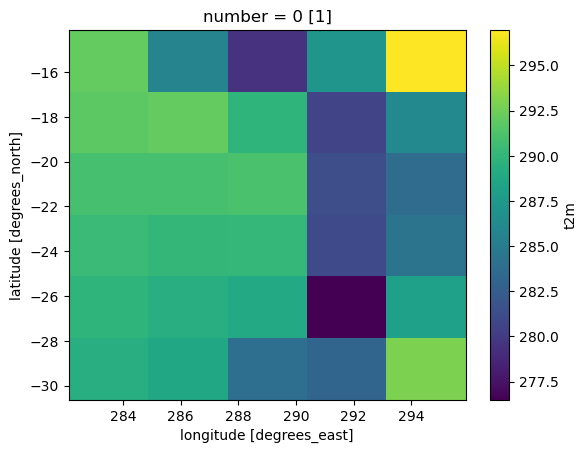

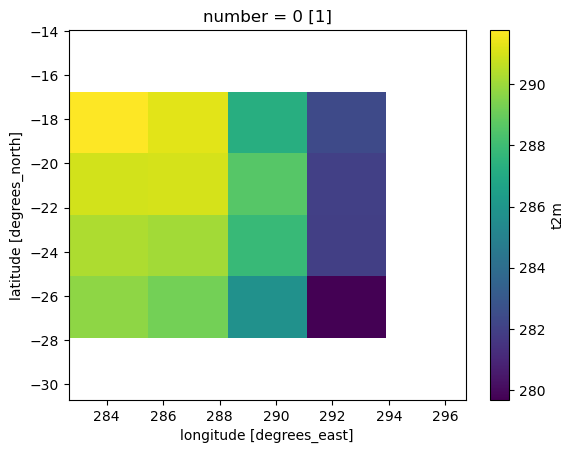

In [106]:
factor=11
Era5_coarse = Era5.coarsen(latitude=factor,longitude=factor,boundary="trim").mean()
Era5_int = Era5_coarse.interp(latitude=d_lat_vals,longitude=d_long_vals,method="linear")
Era5_coarse.plot()
plt.figure()
Era5_int.plot()

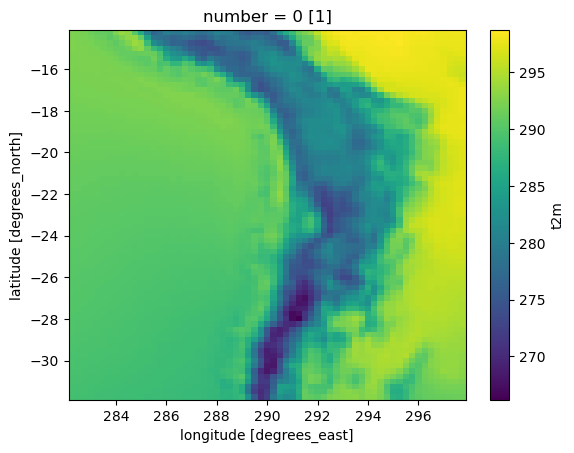

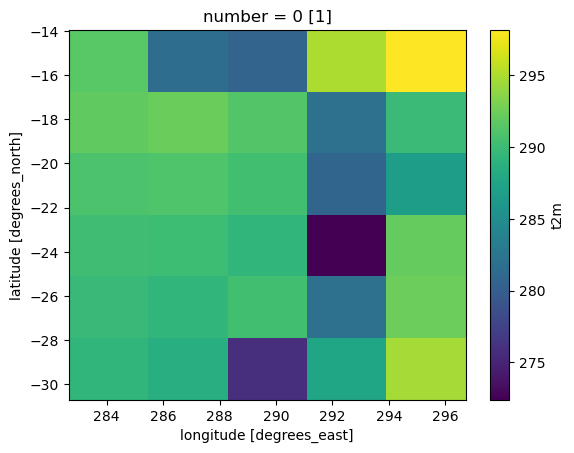

In [69]:
#plt.subplots(1,2)
Era5.plot()
plt.figure()
Era5.interp(latitude=d_lat_vals,longitude=d_long_vals,method="linear").plot()


In [48]:
b = a.mean("time")

In [ ]:
(data_wind["t2m"].sel({"latitude":lat_vals,"longitude":long_vals}).mean("valid_time")-b["tas"])

SyntaxError: invalid syntax (2115443340.py, line 1)

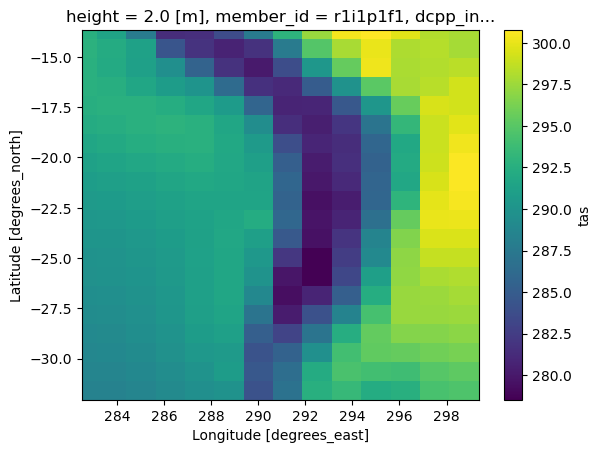

In [38]:
b["tas"].plot()

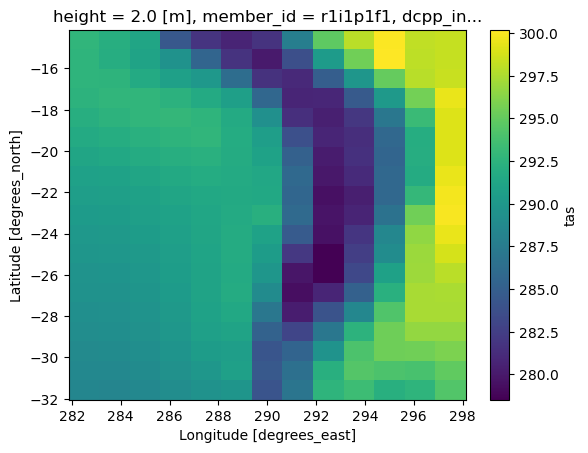

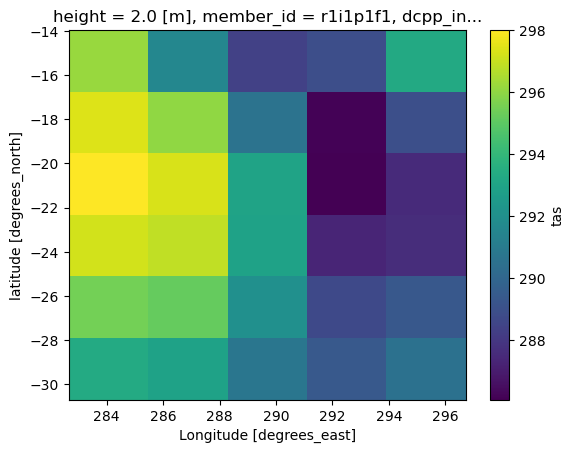

In [57]:
dsiter = iter(dsets)

n = 2
times_mean = np.arange(1850,2024,1)         #timesstamps for model mean
model_mean = np.zeros(times_mean.size)      #variable for the mean of the model
model_mean_diff = np.zeros(times_mean.size) #variable for mean anomaly
meancount = np.zeros(times_mean.size)       #count of how many models contribute to the mean(at borders only like 2 models contribute so we cannot divide by n)
maxsize = 0
model_temps = []
for i in range(n):#36
    current_model = next(dsiter)
    curr_ds = dsets[current_model]
    curr_ds = curr_ds.sortby("time")

    #datasets use different variable names for their spacial data we want to average over
    if "lat" in dsets[current_model].coords:
        #CMIP_mean_temps = curr_ds["tas"].mean(dim=['lat', 'lon']).resample(time="YE").mean().values.ravel()
        
        d_lat_vals = curr_ds["tas"]["lat"].values
        d_long_vals = curr_ds["tas"]["lon"].values
        d_lat_vals = d_lat_vals[d_lat_vals>lat_boundary[0]]
        d_lat_vals = d_lat_vals[d_lat_vals<lat_boundary[1]]

        d_long_vals = d_long_vals[d_long_vals>long_boundary[0]]
        d_long_vals = d_long_vals[d_long_vals<long_boundary[1]]
        plt.figure()
        curr_ds["tas"].sel({"lat":d_lat_vals,"lon":d_long_vals}).mean("time").plot()

    elif "i" in dsets[current_model].coords:
        continue
        #CMIP_mean_temps = curr_ds["tas"].mean("i").resample(time="YE").mean().values.ravel()
    else:
        continue
        #CMIP_mean_temps = curr_ds["tas"].mean(dim=['latitude', 'longitude']).resample(time="YE").mean().values.ravel()
    """
    m1850_1900 = CMIP_mean_temps[:50].mean()

    times = curr_ds.resample(time="YE").mean()["time"].values.astype('datetime64[Y]')
    label = str.join("-",current_model.split(".")[1:3])

    #calculate the effect on mean of models
    if CMIP_mean_temps.size>maxsize:
        maxsize=CMIP_mean_temps.size
        mtimes=times
    meancount[:CMIP_mean_temps.size]+=1
    model_mean[:CMIP_mean_temps.size] +=+CMIP_mean_temps
    model_mean_diff[:CMIP_mean_temps.size] +=+CMIP_mean_temps-m1850_1900

    model_temps.append([times,CMIP_mean_temps,m1850_1900,label])

times_mean = times_mean[:maxsize]
model_mean = model_mean[:maxsize]/meancount[:maxsize]
model_mean_diff = model_mean_diff[:maxsize]/meancount[:maxsize]
mmm1850_1900 = model_mean[:50].mean()
"""